In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import os
import glob

# Path to dataset images
image_folder = '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val'

# List all image files (assuming jpg format)
image_files = glob.glob(os.path.join(image_path, '*.jpg'))
print(image_path)


/mnt/data/underwater_dataset/train_val/images/example_image.jpg


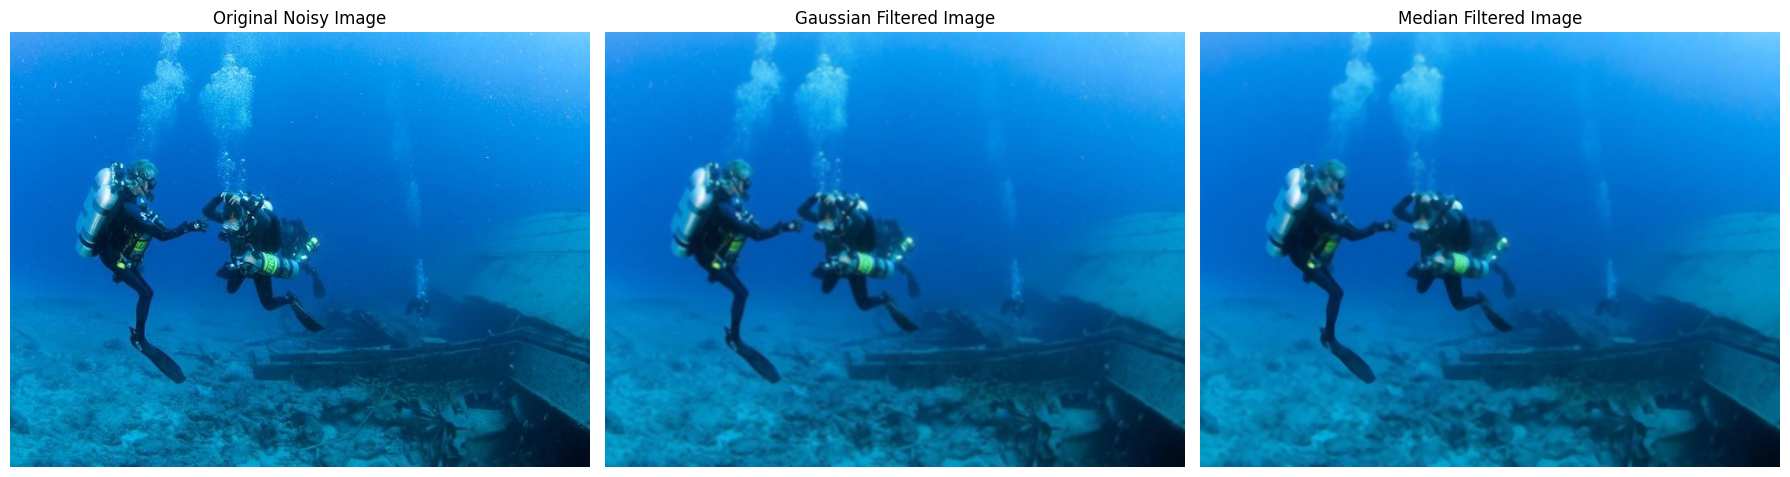

In [4]:
import cv2
import matplotlib.pyplot as plt

# Path example: ensure this points to an existing image
image_path = '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_103_.jpg'

# Load image and convert color
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply Gaussian and Median filters
gaussian = cv2.GaussianBlur(img_rgb, (5, 5), 0)
median = cv2.medianBlur(img_rgb, 5)

# Display images clearly
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian)
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median)
plt.title('Median Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


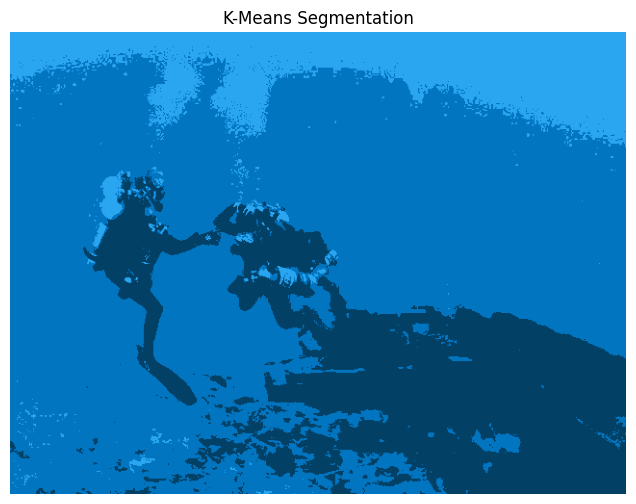

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your filtered image (for example, median filtered image)
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to data for K-means
pixel_vals = img.reshape((-1,3))
pixel_values = np.float32(img.reshape((-1,3)))

# Define criteria and number of clusters (K=3 for simplicity)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
_, labels, centers = cv2.kmeans(np.float32(pixel_values), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to uint8 and reshape to original dimensions
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()].reshape(img.shape)

# Visualize result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('K-Means Segmentation')
plt.axis('off')
plt.show()


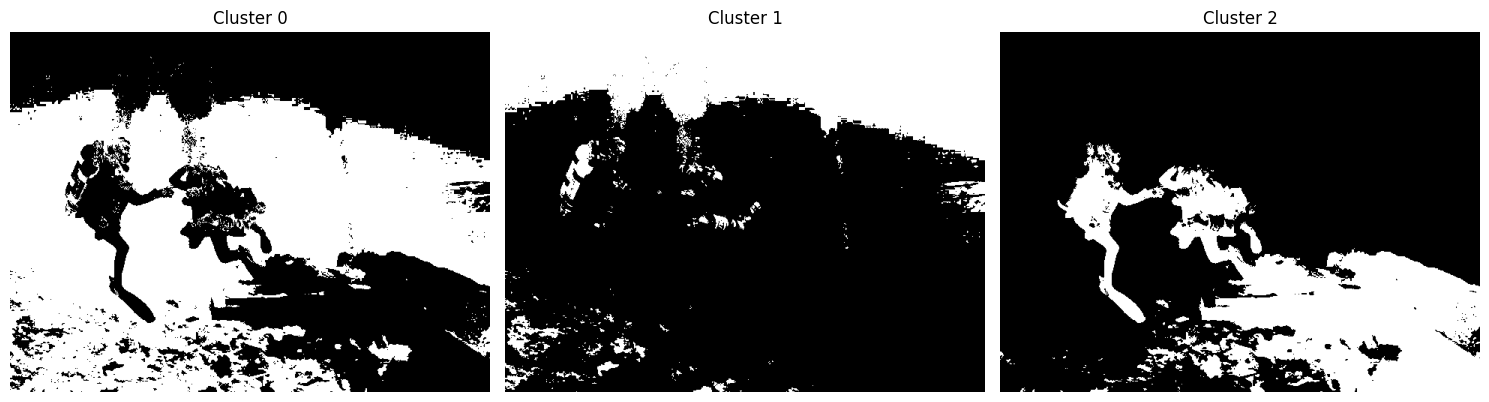

Predicted mask saved at: /kaggle/working/predicted_mask.png


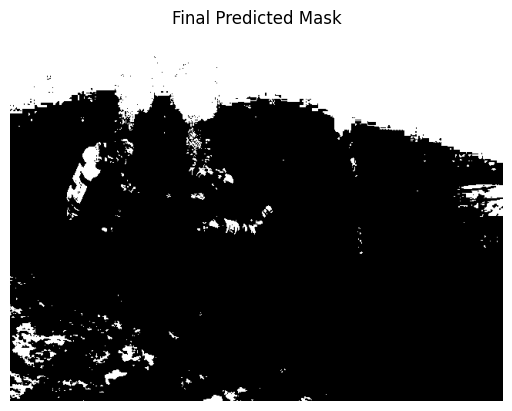

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load original image correctly
original_img_path = '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_103_.jpg'
img = cv2.imread(original_img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply K-means clustering
pixels = np.float32(img_rgb.reshape(-1, 3))
K = 3  # Increased number of clusters for better segmentation
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Reshape labels to image dimensions
labels_img = labels.reshape((img_rgb.shape[:2]))

# Choose the segment most likely to be the foreground object
# Visualize all clusters and select the correct index
fig, ax = plt.subplots(1, K, figsize=(15, 5))
for i in range(K):
    cluster = np.uint8((labels_img == i) * 255)
    ax[i].imshow(cluster, cmap='gray')
    ax[i].set_title(f'Cluster {i}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

# Now, manually inspect the clusters above and select the correct cluster (foreground)
selected_cluster = 1  # Change based on visual inspection above

# Create binary mask from selected cluster
binary_mask = np.uint8((labels_img == selected_cluster) * 255)

# Save clearly predicted mask
predicted_mask_path = '/kaggle/working/predicted_mask.png'
cv2.imwrite(predicted_mask_path, binary_mask)
print("Predicted mask saved at:", predicted_mask_path)

# Visualize final predicted mask
plt.imshow(binary_mask, cmap='gray')
plt.title('Final Predicted Mask')
plt.axis('off')
plt.show()


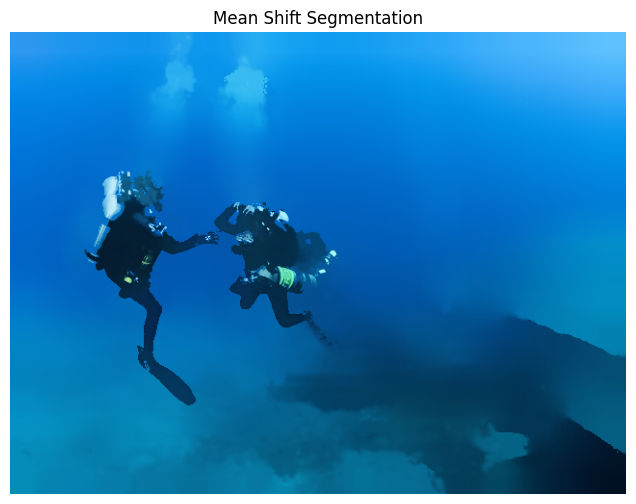

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your filtered image (median or Gaussian filtered)
image_path = '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_103_.jpg'
img = cv2.imread(image_path)

# Check if image is correctly loaded
if img is None:
    raise ValueError("Check the path; image not loaded properly.")
    
# Mean Shift Segmentation
mean_shift = cv2.pyrMeanShiftFiltering(img, sp=21, sr=51)

# Visualization
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(mean_shift, cv2.COLOR_BGR2RGB))
plt.title('Mean Shift Segmentation')
plt.axis('off')
plt.show()


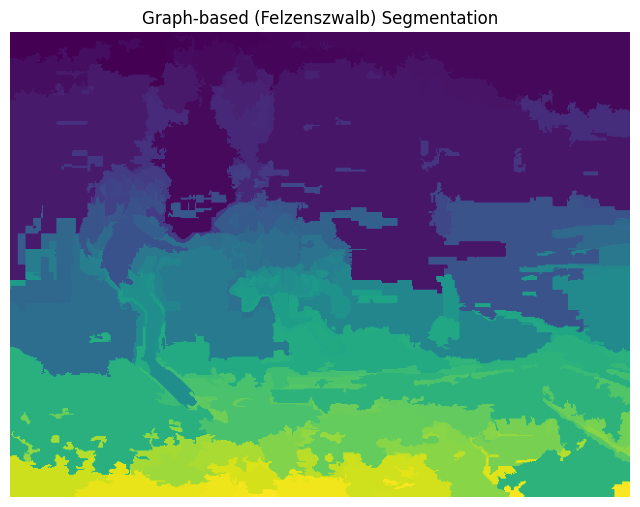

In [8]:
!pip install scikit-image

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb
from skimage.color import label2rgb

# Load image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Felzenszwalb segmentation
segments = felzenszwalb(img_rgb, scale=100, sigma=0.5, min_size=50)

# Visualization of segments
plt.figure(figsize=(8, 8))
plt.imshow(segments)
plt.title('Graph-based (Felzenszwalb) Segmentation')
plt.axis('off')
plt.show()


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read and preprocess the image
image_path = '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_103_.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to get initial regions (adjust threshold as needed)
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Region growing function
def region_growing(img, seed_point, threshold=10):
    h, w = img.shape
    segmented_img = np.zeros_like(img)
    mask = np.zeros((h+2, w+2), np.uint8)

    seed_point = seed_point = (img.shape[1]//2, img.shape[0]//2)  # center pixel as seed
    lo_diff, hi_diff = 10, 10  # intensity differences allowed

    # Apply Region Growing (Flood Fill)
    filled_img = img.copy()
    cv2.floodFill(filled_img, None, seedPoint=seed_point, newVal=255, loDiff=lo_diff, upDiff=hi_diff)

    # Visualize the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filled_img, cmap='gray')
    plt.title('Region Growing (Flood Fill)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


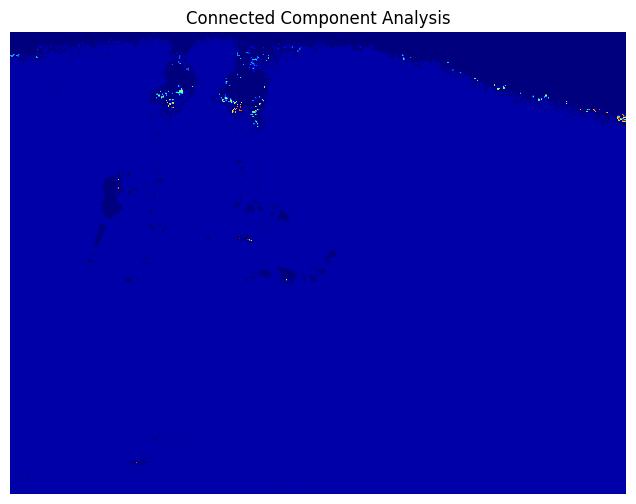

Total connected components detected: 156


In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load image again
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding (adjust based on image conditions)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Connected Component Analysis
num_labels, labels_im = cv2.connectedComponents(binary)

# Map labels to colors for better visualization
label_hue = np.uint8(179*labels_im/np.max(labels_im))
label_viz = cv2.applyColorMap(np.uint8(labels_im * 255 / num_labels), cv2.COLORMAP_JET)

# Visualize results
plt.figure(figsize=(8, 6))
plt.imshow(labels_im, cmap='jet')
plt.title('Connected Component Analysis')
plt.axis('off')
plt.show()

print(f'Total connected components detected: {num_labels - 1}')  # excluding background


IoU (Intersection over Union): 0.3541
Dice Coefficient: 0.5230
Pixel Accuracy: 0.8331


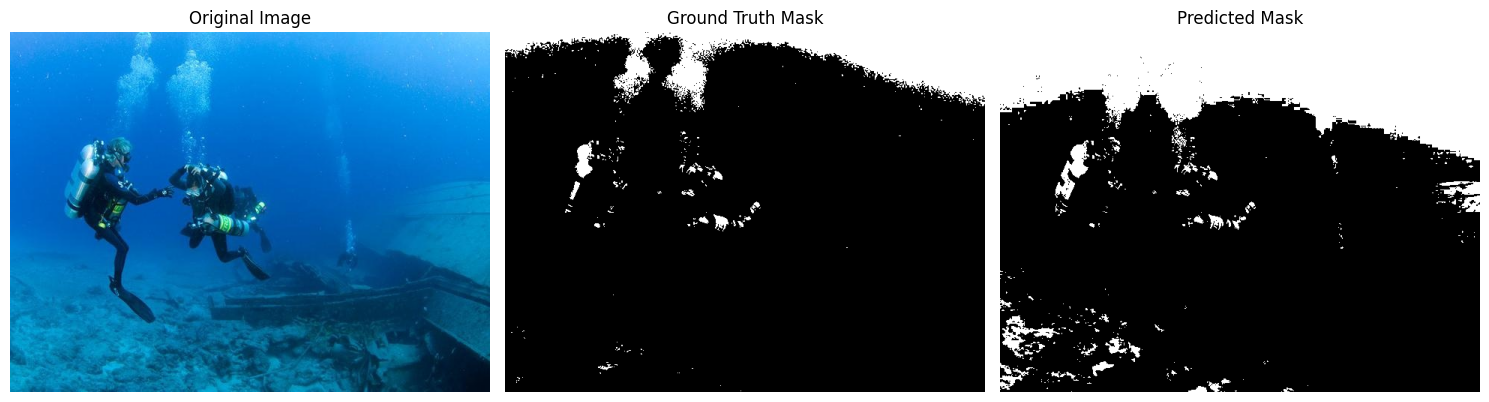

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths (correct and clearly distinct)
original_img_path = '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_103_.jpg'
ground_truth_mask_path = '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_103_.jpg'
predicted_mask_path = '/kaggle/working/predicted_mask.png'  # obtained from your segmentation output

# Load images
original_img = cv2.imread(original_img_path)
ground_truth_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)
predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Check images loaded properly
if ground_truth_mask is None or predicted_mask is None:
    raise ValueError("Check your paths—some images failed to load!")

# Convert masks to binary (0 or 1)
_, gt_binary = cv2.threshold(ground_truth_mask, 127, 1, cv2.THRESH_BINARY)
_, pred_binary = cv2.threshold(predicted_mask, 127, 1, cv2.THRESH_BINARY)

# Compute metrics
intersection = np.logical_and(gt_binary, pred_binary).sum()
union = np.logical_or(gt_binary, pred_binary).sum()
iou = intersection / union
dice = (2 * intersection) / (gt_binary.sum() + pred_binary.sum())
accuracy = np.mean(gt_binary == pred_binary)

# Print evaluation metrics
print(f"IoU (Intersection over Union): {iou:.4f}")
print(f"Dice Coefficient: {dice:.4f}")
print(f"Pixel Accuracy: {accuracy:.4f}")

# Display clearly
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(gt_binary, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[1].axis('off')

axes[2].imshow(pred_binary, cmap='gray')
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.tight_layout()
plt.show()
